<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week4/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# 1. 데이터 로드 및 전처리
df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')

print("--- 데이터셋 정보 ---")
print(df.info())
print("\n--- 레이블(Y) 분포 ---")
print(df['label'].value_counts())

--- 데이터셋 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error

In [67]:
# 결측치 확인
print("--- 결측치 확인 ---")
print(df.isnull().sum().sum()) # 총 결측치 개수 (0이면 결측치 없음)

# 'Unnamed: 0' (불필요한 인덱스 열) 제거
df = df.drop('Unnamed: 0', axis=1)

# X(특성)와 Y(레이블) 분리
X = df.drop('label', axis=1)
Y = df['label']

--- 결측치 확인 ---
0


In [68]:
# Y 레이블에 LabelEncoder 적용 (이진 분류이므로 0과 1로 인코딩)
# 이 데이터셋의 Y는 이미 0과 1이지만, 일관성을 위해 적용합니다.
le = LabelEncoder()
Y = le.fit_transform(Y)

print(f"\n변환 후 Y 레이블: {np.unique(Y)}")


변환 후 Y 레이블: [0 1]


In [69]:
# 학습 데이터 80%, 테스트 데이터 20% 분할
X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [70]:
# 표준화 객체 생성 및 학습 데이터에 fit_transform 적용, 테스트 데이터에 transform 적용
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

print(f"\n표준화된 학습 데이터 X 형태: {X_train_scaled.shape}")


표준화된 학습 데이터 X 형태: (455, 30)


In [71]:
# 딥러닝 모델을 위한 데이터 준비
num_classes = 2 # 0(양성), 1(악성)

# LabelEncoder로 0과 1이 된 Y_raw를 One-Hot 인코딩
Y_train = to_categorical(Y_train_raw, num_classes=num_classes)
Y_test = to_categorical(Y_test_raw, num_classes=num_classes)

input_dim = X_train_scaled.shape[1] # 30개 특성

print(f"One-Hot 인코딩된 Y_train 형태: {Y_train.shape}")

One-Hot 인코딩된 Y_train 형태: (455, 2)


In [72]:
# 8단계: 딥러닝 모델 정의 (Dropout 적용)
model = Sequential([
    # 입력층 + 첫 번째 은닉층
    Dense(128, activation='relu', input_shape=(input_dim,)),

    # 🌟 Dropout 추가: 20%의 뉴런을 랜덤하게 비활성화
    Dropout(0.2),

    # 두 번째 은닉층
    Dense(64, activation='relu'),

    # 🌟 Dropout 추가: 20%의 뉴런을 랜덤하게 비활성화
    Dropout(0.2),

    # 세 번째 은닉층
    Dense(32, activation='relu'),

    # 출력층
    Dense(num_classes, activation='softmax')
])

print("\n--- 개선된 모델 구조 요약 (Dropout 포함) ---")
model.summary()



--- 개선된 모델 구조 요약 (Dropout 포함) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,370 (56.13 KB)

 Trainable params: 14,370 (56.13 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(
    optimizer='adam',
    # One-Hot 인코딩된 레이블에 적합한 손실 함수
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [74]:
EPOCHS = 200 # 과적합 방지 기법을 사용했으므로 Epoch 횟수를 충분히 늘립니다.
BATCH_SIZE = 32

# 🌟 EarlyStopping 설정
# monitor='val_loss': 검증 손실(Validation Loss)을 모니터링
# patience=10: 10 Epoch 동안 val_loss가 개선되지 않으면 훈련 중단
# restore_best_weights=True: 훈련 중 가장 좋았던 가중치로 복원
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

print("\n--- 모델 훈련 시작 (Early Stopping 적용) ---")
# 10단계: 모델 훈련
history = model.fit(
    X_train_scaled, Y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_scaled, Y_test),
    callbacks=[early_stopping], # 🌟 콜백 함수 추가
    verbose=1
)


--- 모델 훈련 시작 (Early Stopping 적용) ---
Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6796 - loss: 0.5979 - val_accuracy: 0.9474 - val_loss: 0.3008
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9258 - loss: 0.2650 - val_accuracy: 0.9474 - val_loss: 0.1701
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9420 - loss: 0.1609 - val_accuracy: 0.9474 - val_loss: 0.1268
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9734 - loss: 0.0921 - val_accuracy: 0.9386 - val_loss: 0.1249
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9742 - loss: 0.0825 - val_accuracy: 0.9386 - val_loss: 0.1109
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9770 - loss: 0.0734 - val_accuracy: 0.9474 - val_loss: 0.0996
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9836 - loss: 0.0752 - val_accuracy: 0.9386 - val_loss: 0.1001
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9852 - 

In [75]:
# 최종 평가
loss, accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

print(f"\n[최종 평가] 테스트 데이터 손실 (Loss): {loss:.4f}")
print(f"[최종 평가] 테스트 데이터 정확도 (Accuracy): {accuracy * 100:.2f}%")

# 예측 결과 생성 (테스트 데이터)
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1) # 가장 높은 확률의 인덱스 (0 또는 1)


[최종 평가] 테스트 데이터 손실 (Loss): 0.0951
[최종 평가] 테스트 데이터 정확도 (Accuracy): 95.61%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


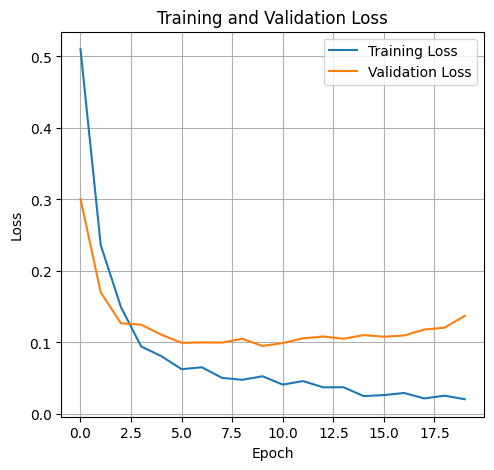

In [76]:
# 손실 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 영역

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

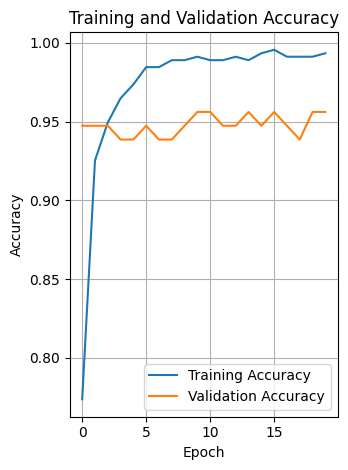

In [77]:
# 정확도 그래프
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 영역

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout() # 그래프 간격 조정
#plt.show()

In [ ]:
#처음 과적합 문제로 인하여 제대로 된 학습결과가 나오지 않았으나, Dropout, EarlyStopping 기능을 포함시켜서
#과적합을 제어하는데 성공하였습니다,
#epoch를 200으로 해놨지만, Ealry Stopping을 통해 15번 반복부근에서 자동으로 멈추게 된 것을 보아, 일정 수의 반복 후에는
#학습이 의미가 없을 수 있겠다고 느꼈습니다.